## Load CIFAR-10 dataset usisng Keras API

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

# load cifar10 data
(trainX, trainy), (testX, testy) = cifar10.load_data()

# check the shape of data
print('shape of trainX is {} and shape of trainy is {}'.format(trainX.shape, trainy.shape))
print('shape of testX is {} and shape of testy is {}'.format(testX.shape, testy.shape))

# plot some images
for i in range(9):
    plt.subplot(330 +1 + i)
    plt.imshow(trainX[i])
plt.show()

## Model Evaluation Test Harness

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
import matplotlib.pyplot as plt
import sys

# First load dataset
def load_dataset():
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    
    # one Hot encoding the target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    
    return trainX, trainY, testX, testY

# second scale the pixels
def prep_pixels(trainX, testX):
    
    # Convert the type from usigned int to float
    train_norm = trainX.astype('float32')
    test_norm = testX.astype('float32')
    
    # normalise the values
    train_norm = train_norm/255.0
    test_norm = test_norm/255.0
    
    return train_norm, test_norm

# Third Define model
def define_model():
    
    # Define model
    model = Sequential()
    
    return model

# fourth plot the learning curve
def summarize_diagnostics(history):
    
    # define subplot
    plt.subplot(221)
    # plot loss
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    
    # plot accuracy
    plt.subplot(222)
    plt.title('Classification Accuracy')
    plt.plot(history.history['acc'], color='blue', label='train')
    plt.plot(history.history['val_acc'], color='orange', label='test')
    
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_plot.png')
    plt.close()
    
# Run the harness test for evaluating the model
def run_harness():
    trainX, trainY, testX, testY = load_dataset()
    
    trainX, testX = prep_pixels(trainX, testX)
    
    model = define_model()
    
    # fit the model
    history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
    
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('accuracy is {}'.format(acc))
    
    summarize_diagnostics(history)
    
run_harness()

## Baseline with one VGG Block

In [4]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
    # scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' ,
    padding= 'same' , input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' ,
    padding= 'same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation= 'relu' , kernel_initializer= 'he_uniform'))
    model.add(Dense(10, activation= 'softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss= 'categorical_crossentropy' , metrics=[ 'accuracy'])
    return model
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color= 'blue' , label= 'train')
    pyplot.plot(history.history['val_loss'], color='orange' , label= 'test' )
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['acc'], color= 'blue' , label= 'train' )
    pyplot.plot(history.history['val_acc'], color= 'orange' , label= 'test' )
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX,
    testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print( '> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
# entry point, run the test harness
run_test_harness()

Instructions for updating:
Use tf.cast instead.


KeyboardInterrupt: 

## Baseline with 2 VGG Blocks

In [5]:

import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
    # scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' ,
    padding= 'same' , input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' ,
    padding= 'same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation= 'relu' , kernel_initializer= 'he_uniform'))
    model.add(Dense(10, activation= 'softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss= 'categorical_crossentropy' , metrics=[ 'accuracy'])
    return model
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color= 'blue' , label= 'train')
    pyplot.plot(history.history['val_loss'], color='orange' , label= 'test' )
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['acc'], color= 'blue' , label= 'train' )
    pyplot.plot(history.history['val_acc'], color= 'orange' , label= 'test' )
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX,
    testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print( '> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
# entry point, run the test harness
run_test_harness()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/aifi/.local/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/home/aifi/.local/lib/python2.7/site-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "/home/aifi/.local/lib/python2.7/site-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/home/aifi/anaconda3/lib/python2.7/inspect.py", line 1058, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/home/aifi/anaconda3/lib/python2.7/inspect.py", line 1018, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/home/aifi/anaconda3/lib/python2.7/inspect.py", line 453, in getsourcefile
    if hasattr(getmodule(object, filename), '__loader__'):
  File "/home/aifi/anaconda

IndexError: string index out of range

## Baseline with 3 VGG Blocks

> 67.910


KeyError: 'val_loss'

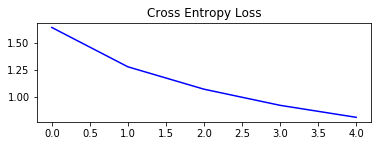

In [10]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
    # scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' ,
    padding= 'same' , input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' ,
    padding= 'same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation= 'relu' , kernel_initializer= 'he_uniform'))
    model.add(Dense(10, activation= 'softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss= 'categorical_crossentropy' , metrics=[ 'accuracy'])
    return model
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color= 'blue' , label= 'train')
    pyplot.plot(history.history['val_loss'], color='orange' , label= 'test' )
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['acc'], color= 'blue' , label= 'train' )
    pyplot.plot(history.history['val_acc'], color= 'orange' , label= 'test' )
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=5, batch_size=32, verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print( '> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
# entry point, run the test harness
run_test_harness()

##  Dropout in 3 VGG Block

In [ ]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
    # scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' ,
    padding= 'same' , input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' ,
    padding= 'same'))
    model.add(MaxPooling2D((2, 2)))
    # add dropout
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    # add dropout
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    # add dropout
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation= 'relu' , kernel_initializer= 'he_uniform'))
    # add dropout
    model.add(Dropout(0.2))
    model.add(Dense(10, activation= 'softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss= 'categorical_crossentropy' , metrics=['accuracy'])
    return model
# plot diagnostic learning curves
def summarize_diagnostics(history):
    print('history', history)
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color= 'blue' , label= 'train')
    pyplot.plot(history.history['val_loss'], color='orange' , label= 'test' )
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color= 'blue' , label= 'train' )
    pyplot.plot(history.history['val_accuracy'], color= 'orange' , label= 'test' )
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_data = (testX, testY),verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print( '> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
# entry point, run the test harness
run_test_harness()

## Data Augmentatiom

In [ ]:
# Here we are auagmenting the data by shifting the height and width and doing a horizontal flip

import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
    # scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' ,
    padding= 'same' , input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' ,
    padding= 'same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation= 'relu' , kernel_initializer= 'he_uniform'))
    model.add(Dense(10, activation= 'softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss= 'categorical_crossentropy' , metrics=['accuracy'])
    return model
# plot diagnostic learning curves
def summarize_diagnostics(history):
    print('history', history)
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color= 'blue' , label= 'train')
    pyplot.plot(history.history['val_loss'], color='orange' , label= 'test' )
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color= 'blue' , label= 'train' )
    pyplot.plot(history.history['val_accuracy'], color= 'orange' , label= 'test' )
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    
    # create a Image data generator
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    
    # prepare iterator
    it_train = datagen.flow(trainX, trainY, batch_size=64)
    
    steps=int(trainX.shape[0]/64)
    # fit model
    history = model.fit(it_train, steps_per_epoch=steps, epochs=10, validation_data = (testX, testY),verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print( '> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
# entry point, run the test harness
run_test_harness()

## Data Augmentation and DropOut

In [ ]:
# Here we are auagmenting the data by shifting the height and width and doing a horizontal flip.
# Dropout is also added to the model

import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
    # scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' ,
    padding= 'same' , input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' ,
    padding= 'same'))
    model.add(MaxPooling2D((2, 2)))
    # add dropout
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    # add dropout
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    # add dropout
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation= 'relu' , kernel_initializer= 'he_uniform'))
    # add dropout
    model.add(Dropout(0.2))
    model.add(Dense(10, activation= 'softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss= 'categorical_crossentropy' , metrics=['accuracy'])
    return model
# plot diagnostic learning curves
def summarize_diagnostics(history):
    print('history', history)
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color= 'blue' , label= 'train')
    pyplot.plot(history.history['val_loss'], color='orange' , label= 'test' )
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color= 'blue' , label= 'train' )
    pyplot.plot(history.history['val_accuracy'], color= 'orange' , label= 'test' )
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    
    # create a Image data generator
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    
    # prepare iterator
    it_train = datagen.flow(trainX, trainY, batch_size=64)
    
    steps=int(trainX.shape[0]/64)
    # fit model
    history = model.fit(it_train, steps_per_epoch=steps, epochs=10, validation_data = (testX, testY),verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print( '> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
# entry point, run the test harness
run_test_harness()

## Dropout, Data Augmentation and Batch Normalization

In [ ]:
# Here we are auagmenting the data by shifting the height and width and doing a horizontal flip.
# Dropout is also added to the model

import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
    # scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' ,
    padding= 'same' , input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' ,
    padding= 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    # add dropout
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    # add dropout
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    # add dropout
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation= 'relu' , kernel_initializer= 'he_uniform'))
    model.add(BatchNormalization())
    # add dropout
    model.add(Dropout(0.5))
    model.add(Dense(10, activation= 'softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss= 'categorical_crossentropy' , metrics=['accuracy'])
    return model
# plot diagnostic learning curves
def summarize_diagnostics(history):
    print('history', history)
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color= 'blue' , label= 'train')
    pyplot.plot(history.history['val_loss'], color='orange' , label= 'test' )
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color= 'blue' , label= 'train' )
    pyplot.plot(history.history['val_accuracy'], color= 'orange' , label= 'test' )
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    
    # create a Image data generator
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    
    # prepare iterator
    it_train = datagen.flow(trainX, trainY, batch_size=64)
    
    steps=int(trainX.shape[0]/64)
    # fit model
    history = model.fit(it_train, steps_per_epoch=steps, epochs=400, validation_data = (testX, testY),verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print( '> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
# entry point, run the test harness
run_test_harness()

## Save the model

In [ ]:
# Here we are auagmenting the data by shifting the height and width and doing a horizontal flip.
# Dropout is also added to the model

import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY
    # scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' ,
    padding= 'same' , input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation= 'relu' , kernel_initializer= 'he_uniform' ,
    padding= 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    # add dropout
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    # add dropout
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    # add dropout
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation= 'relu' , kernel_initializer= 'he_uniform'))
    model.add(BatchNormalization())
    # add dropout
    model.add(Dropout(0.5))
    model.add(Dense(10, activation= 'softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss= 'categorical_crossentropy' , metrics=['accuracy'])
    return model
# plot diagnostic learning curves
def summarize_diagnostics(history):
    print('history', history)
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color= 'blue' , label= 'train')
    pyplot.plot(history.history['val_loss'], color='orange' , label= 'test' )
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color= 'blue' , label= 'train' )
    pyplot.plot(history.history['val_accuracy'], color= 'orange' , label= 'test' )
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    
    # create a Image data generator
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    
    # prepare iterator
    it_train = datagen.flow(trainX, trainY, batch_size=64)
    
    steps=int(trainX.shape[0]/64)
    # fit model
    history = model.fit(it_train, steps_per_epoch=steps, epochs=10, validation_data = (testX, testY),verbose=0)
    
    # save the model
    model.save('final_model.h5')
# entry point, run the test harness
run_test_harness()

## Predictions

In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

def load_image(filename):
    # load image
    image = load_img(filename, target_size=(32, 32))
    
    # convert image to numpy array
    image = img_to_array(image)
    
    # reshape the image
    image = image.reshape(1, 32, 32, 3)
    
    # convert the type
    image = image.astype('float32')
    
    # normalize the image
    image = image/255.0
    return image

# load the image and run the class
def run_example():
    image = load_image('sample_image-1.png')
    
    # load model
    model = load_model('final_model.h5')
    
    # predict class
    result = model.predict_classes(image)
    
    print(result[0])
    
run_example()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


ValueError: Error when checking input: expected conv2d_8_input to have shape (28, 28, 1) but got array with shape (32, 32, 3)